In [2]:
import pandas as pd
fake = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
real = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

In [3]:
fake['label'] = 1 
real['label'] = 0

In [4]:
fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [5]:
df = pd.concat([fake, real]).reset_index(drop=True)
print("Dataset shape:", df.shape)
print(df['label'].value_counts())

Dataset shape: (44898, 5)
label
1    23481
0    21417
Name: count, dtype: int64


In [11]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = word_tokenize(text)  # tokenize
    tokens = [t for t in tokens if t not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  # lemmatize
    return " ".join(tokens)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
df['processed_text'] = (df['title'].fillna('') + ' ' + df['text'].fillna('')).apply(preprocess)


In [15]:
X = df['processed_text']
y = df['label']

In [16]:
print (X)

0        donald trump sends embarrassing new year ’ eve...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes internet joke thr...
3        trump obsessed even obama ’ name coded website...
4        pope francis called donald trump christmas spe...
                               ...                        
44893    fully committed nato back new u approach afgha...
44894    lexisnexis withdrew two product chinese market...
44895    minsk cultural hub becomes authority minsk reu...
44896    vatican upbeat possibility pope francis visiti...
44897    indonesia buy billion worth russian jet jakart...
Name: processed_text, Length: 44898, dtype: object


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# LogisticRegression & Support Vector Machine (SVM)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)


svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf, y_train)


SVC(kernel='linear', probability=True)

In [29]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("F1-score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real','Fake'], yticklabels=['Real','Fake'])
    plt.title("Confusion Matrix")
    plt.show()



Logistic Regression Evaluation:
Accuracy: 0.9891982182628062
F1-score: 0.9897473839974633

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4247
           1       0.99      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



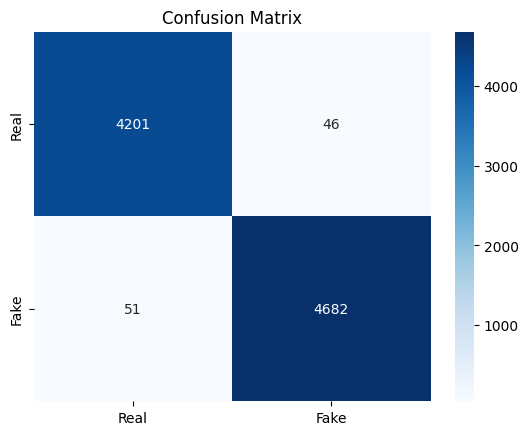

SVM Evaluation:
Accuracy: 0.9943207126948775
F1-score: 0.9946071692925875

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4247
           1       1.00      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



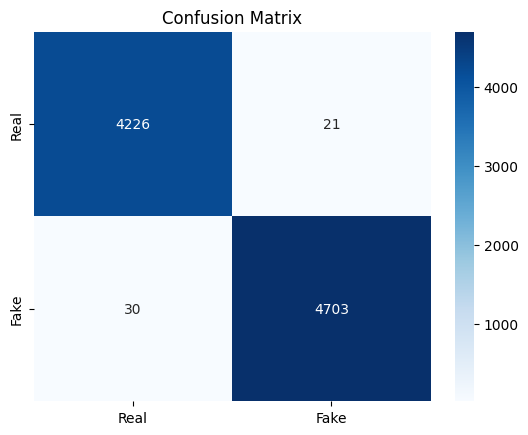

In [30]:
print("Logistic Regression Evaluation:")
evaluate_model(lr_model, X_test_tfidf, y_test)

print("SVM Evaluation:")
evaluate_model(svm_model, X_test_tfidf, y_test)

# Bonus:
 # Use a word cloud to visualize common terms in fake vs. real news

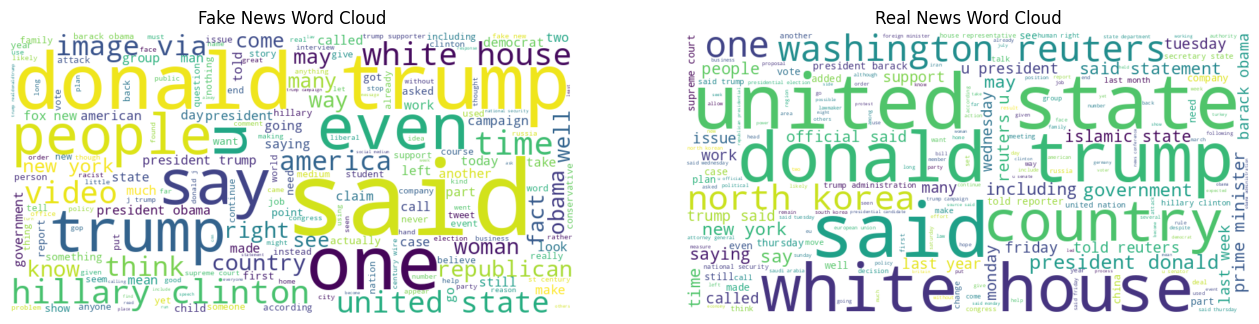

In [32]:
from wordcloud import WordCloud
fake_text = " ".join(df[df['label']==1]['processed_text'])
real_text = " ".join(df[df['label']==0]['processed_text'])

wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News Word Cloud")

plt.subplot(1,2,2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Real News Word Cloud")

plt.show()

In [33]:
import joblib

joblib.dump(tfidf, "tfidf_vectorizer.pkl")

joblib.dump(lr_model, "fake_news_model.pkl")


['fake_news_model.pkl']